# Vinushree Nagraj
# Saiteja
# Module 6 Collaborative Project
# Identification of Breast Cancer Tumor

In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
rcParams['figure.figsize'] = (15, 10)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Collecting data

In [ ]:
#retrive diagnosing breast cancer data
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploring and preparing the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Drop unnecessary columns
try:
    data = data.drop(columns = [ 'Unnamed: 32'])
except KeyError:
  print ("Note: Either the columns were not found or already dropped.")

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualization

In [ ]:
y = data.diagnosis

Number of Benign:  357
Number of Malignant :  212


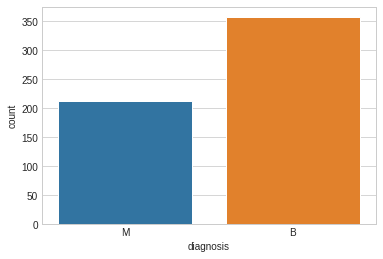

In [ ]:
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [ ]:
data_1 = data.groupby(data['radius_mean']).mean()
data_1

,id,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6.981,862722.0,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.000000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0000,0.00000,0.2932,0.09382
7.691,921362.0,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.013640,0.2037,0.07751,0.2196,1.4790,1.445,11.730,0.015470,0.064570,0.09252,0.013640,0.02105,0.007551,8.678,31.89,54.49,223.6,0.15960,0.30640,0.3393,0.05000,0.2790,0.10660
7.729,921092.0,25.49,47.98,178.8,0.08098,0.04878,0.00000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.00000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0000,0.00000,0.3058,0.09938
7.760,92751.0,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,0.05884,0.3857,1.4280,2.548,19.150,0.007189,0.004660,0.00000,0.000000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039
8.196,85713702.0,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.0688,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25.220,8611555.0,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.184500,0.1829,0.06782,0.8973,1.4740,7.382,120.000,0.008166,0.056930,0.05730,0.020300,0.01065,0.005893,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.6476,0.28670,0.2355,0.10510
25.730,899987.0,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,0.9948,0.8509,7.222,153.100,0.006369,0.042430,0.04266,0.015080,0.02335,0.003385,33.130,23.58,229.30,3234.0,0.15300,0.59370,0.6451,0.27560,0.3690,0.08815
27.220,873592.0,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.187800,0.1800,0.05770,0.8361,1.4810,5.820,128.700,0.004631,0.025370,0.03109,0.012410,0.01575,0.002747,33.120,32.85,220.80,3216.0,0.14720,0.40340,0.5340,0.26880,0.2856,0.08082


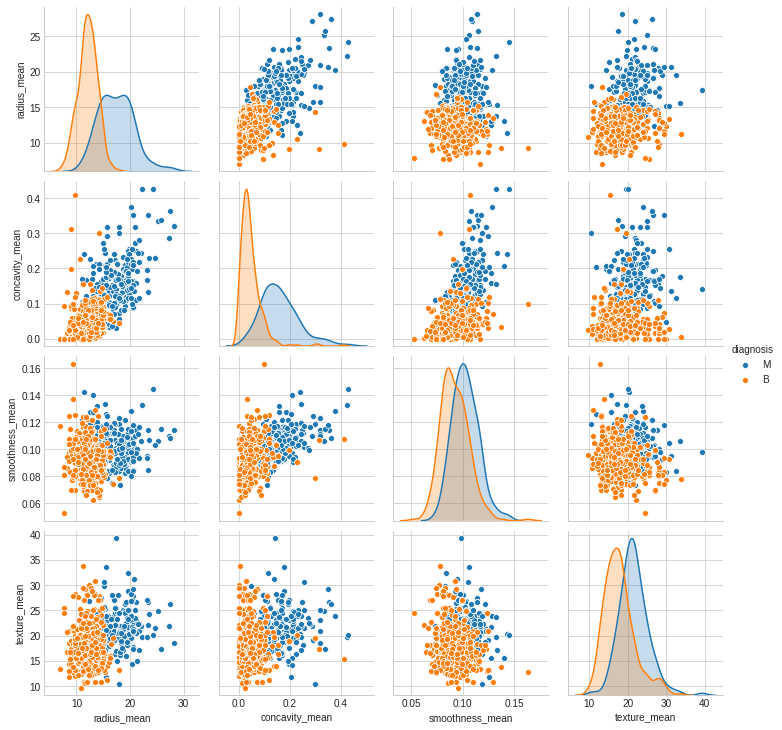

In [ ]:
sns.pairplot(data, hue="diagnosis", vars = ["radius_mean", "concavity_mean", "smoothness_mean", "texture_mean"])
plt.show()

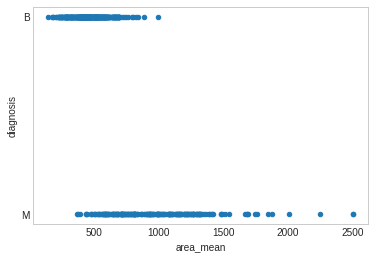

In [ ]:
data.plot(kind='scatter', x='area_mean', y='diagnosis')
plt.grid()
plt.show()

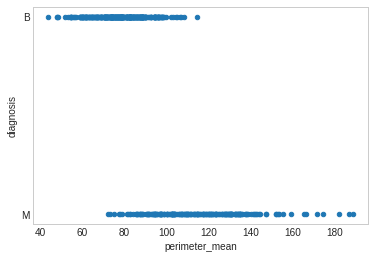

In [ ]:
data.plot(kind='scatter', x='perimeter_mean', y='diagnosis')
plt.grid()
plt.show()

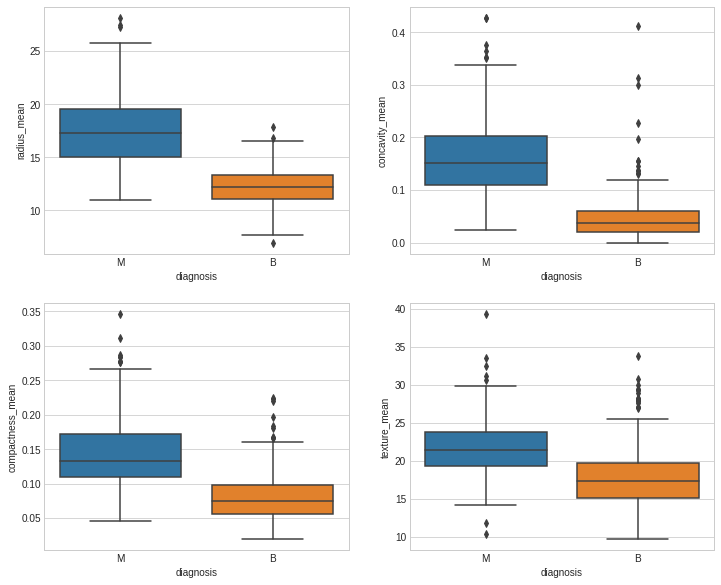

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.boxplot(x='diagnosis', y='radius_mean', data =data,ax=axes[0][0])
sns.boxplot(x='diagnosis', y='concavity_mean', data =data,ax=axes[0][1])
sns.boxplot(x='diagnosis', y='compactness_mean', data =data,ax=axes[1][0])
sns.boxplot(x='diagnosis', y='texture_mean', data =data,ax=axes[1][1])

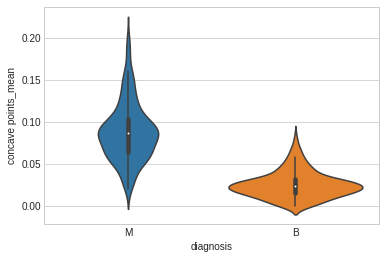

In [ ]:
sns.violinplot(x='diagnosis', y='concave points_mean', data =data)

In [ ]:
corr = data.corr()
corr.shape

(31, 31)

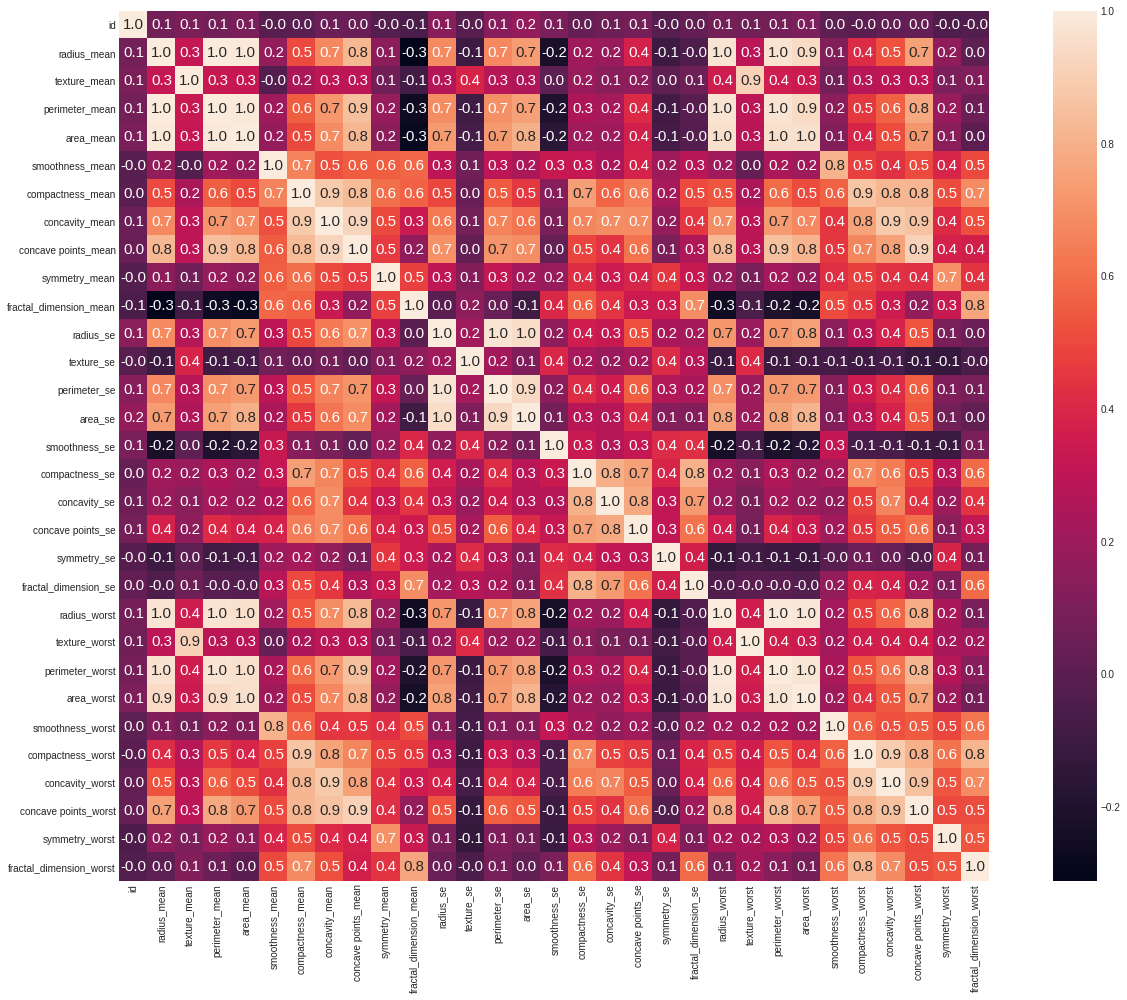

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(23,16))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})
plt.show()

# Data Preparation and pre-processing

In [ ]:
#change the diagnosis value to integer
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

data['diagnosis'] = data['diagnosis'].apply(diagnosis_value)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
target=data.diagnosis
data.drop(['diagnosis'],axis=1,inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,target,train_size=0.8,random_state=0)

In [ ]:
X_train.shape,y_train.shape

((455, 31), (455,))

# Model implementation and selection

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),('classifier',RandomForestClassifier())])

In [ ]:
grid_params=[
              {
                  "classifier": [GradientBoostingClassifier()],
                  "classifier__n_estimators": [50,60,75,100],
                  "classifier__max_depth": [2,3,5]},

              {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [50,75,100],
                 "classifier__max_depth":[2,4,6,None],
                 "classifier__min_samples_leaf":[1,2,5],
                 "classifier__max_leaf_nodes": [2, 4,6]},
             {
              "classifier":[DecisionTreeClassifier()],
              "classifier__max_depth":[2,5,7,None],
              "classifier__min_samples_leaf":[1,2,3,5]
             },
             {
                 "classifier": [GaussianNB()]
             }
]

In [ ]:
clf=GridSearchCV(pipe,grid_params,cv=5,n_jobs=-1)
best_model=clf.fit(X_train,y_train)

In [ ]:
print(best_model.best_estimator_)
print("")
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
           

In [ ]:
y_pred=best_model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.96      0.94      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1080x720 with 0 Axes>

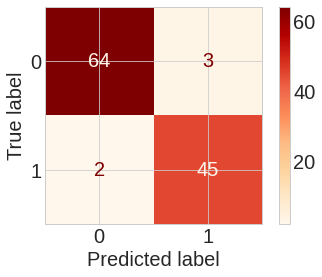

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})
plot_confusion_matrix(best_model,X_test,y_test,cmap="OrRd")
plt.show()